In [2]:
%%bash 
#Make constraint input. 
rm ../../asyn_MD/resid_sel_all_ev1.dat
for ((c=1;c<=140-1;c+=2))do
 for ((j=$c+2;j<=139;j+=2))do
  echo $c $j >> ../../asyn_MD/mmseqs/resid_sel_all_ev1.dat
done 
done


    

In [3]:
import pandas as pd
import numpy as np
import subprocess
import glob
import matplotlib.pyplot as plt
import sys,os
#The contact map is in distance (Angstong)
cwd = os.getcwd()
data_f=str(cwd)+"/../../asyn_MD/"
AF_contacts_file=data_f+"mean.csv"
AF_resid_sel_file=data_f+"resid_sel_all_ev1.dat"
AF_contacts_stdev_file=data_f+"std.csv"
AF_contacts=pd.read_csv(AF_contacts_file)
AF_contacts_stdev=pd.read_csv(AF_contacts_stdev_file)
AF_contacts
AF_contacts_stdev

exp=[]
labels=[]
lista=[]
residue_pairs=np.loadtxt(AF_resid_sel_file,usecols=(0,1))
for i in range(len(residue_pairs)):

    r1=int(residue_pairs[i][0])
    r2=str(int(residue_pairs[i][1]))
    #This is to accoun that the trajectory starts residues from 1 while the AF contact map from 0.
    r1_m1=int(residue_pairs[i][0]-1)
    
    r1_label=str(r1)
    r2_label=r2
    
    #The first index of loc needs to be integer and minus1, since it starts from 0. index 2 needs to be str and reads properly
    exp.append([AF_contacts.loc[r1_m1].at[r2],AF_contacts_stdev.loc[r1_m1].at[r2]])
    #exp.append([AF_contacts.loc[r1_p1].at[r2_p1],2])
    labels.append('resid_'+r1_label+'-'+r2_label)

    lista.append([int(r1_label),int(r2_label)])
    #lista.append([r1_p1,r2_p1])

exp = np.array(exp)

labels=np.array(labels)


print(lista)
with open(data_f+'AF_contacts_constr.txt', 'w') as f:
    f.write("# DATA=JCOUPLINGS\n")
    for line in range(len(exp)):
        f.write(str(labels[line])+" "+str(exp[line,0])+" "+str(exp[line,1])+"\n")
        

[[ 7.17386262  1.22182341]
 [10.06802288  3.02078512]
 [14.48042088  3.3141192 ]
 ...
 [ 7.26552509  1.10331   ]
 [12.05261119  2.34025276]
 [ 6.98909781  1.12958704]]
[[1, 3], [1, 5], [1, 7], [1, 9], [1, 11], [1, 13], [1, 15], [1, 17], [1, 19], [1, 21], [1, 23], [1, 25], [1, 27], [1, 29], [1, 31], [1, 33], [1, 35], [1, 37], [1, 39], [1, 41], [1, 43], [1, 45], [1, 47], [1, 49], [1, 51], [1, 53], [1, 55], [1, 57], [1, 59], [1, 61], [1, 63], [1, 65], [1, 67], [1, 69], [1, 71], [1, 73], [1, 75], [1, 77], [1, 79], [1, 81], [1, 83], [1, 85], [1, 87], [1, 89], [1, 91], [1, 93], [1, 95], [1, 97], [1, 99], [1, 101], [1, 103], [1, 105], [1, 107], [1, 109], [1, 111], [1, 113], [1, 115], [1, 117], [1, 119], [1, 121], [1, 123], [1, 125], [1, 127], [1, 129], [1, 131], [1, 133], [1, 135], [1, 137], [1, 139], [3, 5], [3, 7], [3, 9], [3, 11], [3, 13], [3, 15], [3, 17], [3, 19], [3, 21], [3, 23], [3, 25], [3, 27], [3, 29], [3, 31], [3, 33], [3, 35], [3, 37], [3, 39], [3, 41], [3, 43], [3, 45], [3, 47],

In [4]:
#Make the plumed file
import mdtraj as md
pdb=data_f+'../priors/topol_asyn_MD.pdb'
dcd=data_f+'../priors/asyn_MD.dcd'


topology = md.load(pdb).topology
traj = md.load(dcd, top=pdb)
lista_CB=[]
for i in lista:
    if (topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")):
        res1=topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")
        #print(i[0],res1)
    if (topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")):
        res2=topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")
        #print(i[1],res2)
    if (topology.select("residue "+str(i[0])+" and name CB")):
        res1=topology.select('name CB and residue '+str(i[0]))
        #print(i[0],res1)
    if (topology.select("residue "+str(i[1])+" and name CB")):
        res2=topology.select('name CB and residue '+str(i[1]))
        #print(i[1],res2)
    lista_CB.append([int(res1),int(res2)])

print('CB-atomlist')

print(len(lista_CB))
print(lista_CB)


distance_nm=md.compute_distances(traj,lista_CB)


#This is converting to Angstorng
calc=distance_nm[:] * 10
print(calc)

with open(data_f+'AF_contacts_calc.txt', 'w') as f:
    for line in range(len(calc[:,0])):

        f.write(str(line)+" ")
        for j in range(len(lista)): 
            f.write(str(calc[line,j])+" ")
        
        f.write("\n")        
        


/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_5661/975848591.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")):
/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_5661/975848591.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")):
/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_5661/975848591.py:21: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("resid

CB-atomlist
2415
[[4, 35], [4, 71], [4, 107], [4, 136], [4, 169], [4, 201], [4, 223], [4, 255], [4, 275], [4, 300], [4, 336], [4, 372], [4, 398], [4, 423], [4, 440], [4, 472], [4, 508], [4, 530], [4, 565], [4, 599], [4, 620], [4, 656], [4, 690], [4, 716], [4, 747], [4, 773], [4, 797], [4, 823], [4, 860], [4, 896], [4, 928], [4, 958], [4, 985], [4, 1002], [4, 1028], [4, 1055], [4, 1081], [4, 1105], [4, 1131], [4, 1170], [4, 1200], [4, 1222], [4, 1239], [4, 1269], [4, 1289], [4, 1310], [4, 1340], [4, 1378], [4, 1412], [4, 1445], [4, 1477], [4, 1506], [4, 1528], [4, 1552], [4, 1581], [4, 1610], [4, 1644], [4, 1673], [4, 1703], [4, 1729], [4, 1755], [4, 1780], [4, 1816], [4, 1847], [4, 1873], [4, 1895], [4, 1933], [4, 1966], [4, 1995], [35, 71], [35, 107], [35, 136], [35, 169], [35, 201], [35, 223], [35, 255], [35, 275], [35, 300], [35, 336], [35, 372], [35, 398], [35, 423], [35, 440], [35, 472], [35, 508], [35, 530], [35, 565], [35, 599], [35, 620], [35, 656], [35, 690], [35, 716], [35, 7

[[ 8.218731  15.563269  19.72909   ...  4.482503  10.686129   7.6072884]
 [ 6.747423  12.231333  15.166122  ...  5.76802   12.053862   7.153949 ]
 [ 8.044102  12.941616  15.287227  ...  5.088669  11.365567   8.623062 ]
 ...
 [ 6.681214  13.681073  16.731506  ...  7.780213  11.283354   8.168173 ]
 [ 7.1271367 11.496305  14.903458  ...  8.394199  12.567135   4.8489513]
 [ 5.938988  11.55007    5.9963994 ...  7.8274508 14.112512   7.834618 ]]


In [13]:

file=open(data_f+'MD_distances.dat', 'w')
file.write("\n")
for i in range(0,calc.shape[1]):
    file.write(str(np.average(calc[:,i]))+"\n")
file.close()
file_name=data_f+'AF_MD.dat'
lis=subprocess.call(['paste'] + glob.glob(data_f+'AF_contacts_constr.txt') + [data_f+'MD_distances.dat'] , stdout=open(file_name, 'w') )

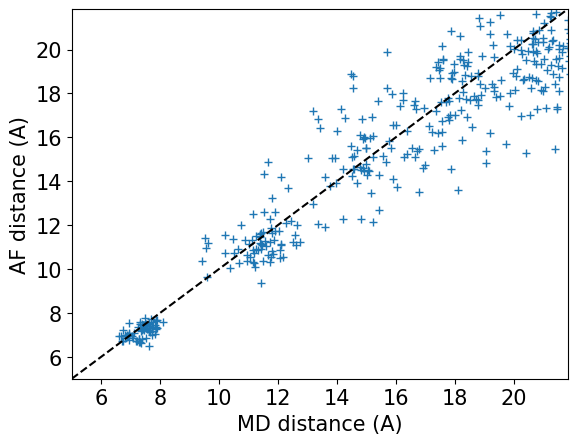

In [9]:
MD=np.loadtxt(file_name,usecols=(3))
AF=np.loadtxt(file_name,usecols=(1))
plt.scatter(MD, AF, marker='+',lw=1)
plt.xlim(5,21.84)
plt.ylim(5,21.84)
plt.xlabel("MD distance (A)",size=15) 
plt.ylabel("AF distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axline((1, 1), slope=1,ls='--',color='black')
plt.savefig(data_f+'MD_AF.pdf',bbox_inches='tight')

In [11]:
rg_A=md.compute_rg(traj)*10


In [14]:
import random
#Now I am selecting only the distnaces that have average lower  than <20 in the MD. 
#The reason is that AF has upper bound ad 21 A.
MD=np.loadtxt(file_name,usecols=(3))
resid=list(np.loadtxt(file_name,usecols=(0),dtype=str))

res_lt1=[]
file=open(data_f+"resid_sel_all_lt20.dat", 'w')
          
for i in range(0,len(resid)):
    if(MD[i]<20):
        res_lt1.append(str(resid[i].split("-")[0].split("_")[1])+" "+str(resid[i].split("-")[1]))


print(len(res_lt1))

#Select 100 random values
res_lt1=random.sample(res_lt1, 100)
for i in range(0,len(res_lt1)):
    file.write(str(res_lt1[i])+"\n")

file.close()

305


In [15]:
#The contact map is in distance (Angstong)
AF_contacts_file=data_f+"mean.csv"
AF_resid_sel_file=data_f+"resid_sel_all_lt20.dat"
AF_contacts_stdev_file=data_f+"std.csv"
AF_contacts=pd.read_csv(AF_contacts_file)
AF_contacts_stdev=pd.read_csv(AF_contacts_stdev_file)
AF_contacts
AF_contacts_stdev

exp=[]
labels=[]
lista=[]
residue_pairs=np.loadtxt(AF_resid_sel_file,usecols=(0,1))
for i in range(len(residue_pairs)):

    r1=int(residue_pairs[i][0])
    r2=str(int(residue_pairs[i][1]))
    #This is to accoun that the trajectory starts residues from 1 while the AF contact map from 0.
    r1_m1=int(residue_pairs[i][0]-1)
    
    r1_label=str(r1)
    r2_label=r2
    
    #The first index of loc needs to be integer and minus1, since it starts from 0. index 2 needs to be str and reads properly
    exp.append([AF_contacts.loc[r1_m1].at[r2],AF_contacts_stdev.loc[r1_m1].at[r2]])
    labels.append('resid_'+r1_label+'-'+r2_label)
    lista.append([int(r1_label),int(r2_label)])


exp = np.array(exp)

labels=np.array(labels)
labels
print(exp)
print (labels)
len(exp)
print(len(lista))
print(lista)
with open(data_f+'AF_contacts_constr.txt', 'w') as f:
    f.write("# DATA=JCOUPLINGS\n")
    for line in range(len(exp)):
        f.write(str(labels[line])+" "+str(exp[line,0])+" "+str(exp[line,1])+"\n")


lista_CB=[]      
for i in lista:
    if (topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")):
        res1=topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")
        #print(i[0],res1)
    if (topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")):
        res2=topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")
        #print(i[1],res2)
    if (topology.select("residue "+str(i[0])+" and name CB")):
        res1=topology.select('name CB and residue '+str(i[0]))
        #print(i[0],res1)
    if (topology.select("residue "+str(i[1])+" and name CB")):
        res2=topology.select('name CB and residue '+str(i[1]))
        #print(i[1],res2)
    lista_CB.append([int(res1),int(res2)])

print('CB-atomlist')
for j in lista_CB:
    print(j[0],j[1])
print(len(lista_CB))
print(lista_CB)

for i in lista:
    print(i)


      
traj = md.load(dcd, top=pdb)
distance_nm=md.compute_distances(traj,lista_CB)

#This is converting to Angstrom
calc=distance_nm[:] * 10
print(calc)

with open(data_f+'AF_contacts_calc.txt', 'w') as f:
    for line in range(len(calc[:,0])):

        f.write(str(line)+" ")
        for j in range(len(lista)): 
            f.write(str(calc[line,j])+" ")
        
        f.write("\n")        

[[21.23892581  2.0227788 ]
 [11.07510553  2.65975596]
 [14.19972619  3.8355712 ]
 [10.69679278  2.57698356]
 [18.95916247  3.45581554]
 [19.18126597  3.50783668]
 [ 7.72311556  1.1603475 ]
 [ 6.84366466  0.84379163]
 [15.41935819  3.67459325]
 [ 6.76279875  0.87785451]
 [17.02903409  4.01048186]
 [15.07836188  4.04272365]
 [17.27701041  4.29971013]
 [ 7.68975397  1.15577057]
 [19.89450741  3.4331242 ]
 [13.905694    3.54273845]
 [19.72154309  3.51438466]
 [14.53936691  4.30698555]
 [13.21637147  3.94104408]
 [ 6.94165194  0.77168197]
 [13.44489912  3.42122302]
 [11.04825541  2.67332433]
 [15.37248228  4.44466337]
 [12.25538778  3.8218989 ]
 [ 7.57570344  1.0504502 ]
 [18.72450387  3.92295584]
 [20.15408116  2.90056023]
 [11.41974969  2.93466126]
 [11.16439788  2.74212445]
 [19.254545    3.54760822]
 [17.43782003  4.77399   ]
 [13.71209413  3.654479  ]
 [16.90361694  3.34785218]
 [14.77097506  4.81549537]
 [11.15978991  2.7561284 ]
 [14.64195938  3.55741892]
 [ 7.36839547  1.01927597]
 

/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_5661/1881529233.py:53: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")):
/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_5661/1881529233.py:62: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("residue "+str(i[1])+" and name CB")):
/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_5661/1881529233.py:56: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("residue "+str(i[1])+" and

CB-atomlist
1340 1581
985 1028
1477 1552
1581 1644
372 472
1445 1581
201 223
599 620
1895 1995
1055 1081
656 773
1002 1081
797 928
620 656
1131 1310
1412 1506
1105 1239
565 690
472 565
423 440
1340 1445
107 169
620 747
440 530
1644 1673
860 1002
223 336
1200 1239
1222 1269
716 823
423 599
1445 1528
275 372
440 565
1002 1055
530 620
398 423
1895 1966
928 958
35 71
1340 1506
300 398
1200 1289
1269 1289
336 372
1412 1552
860 958
1378 1477
1028 1170
928 985
1170 1200
440 599
275 336
169 223
1506 1581
860 928
1755 1847
1528 1610
136 169
896 985
336 440
1340 1378
599 716
71 169
1170 1222
1340 1610
1340 1528
107 223
1581 1703
1506 1552
1847 1895
1081 1131
860 985
860 896
1506 1610
958 1105
896 958
797 896
1200 1310
958 985
1873 1966
565 656
1131 1289
1780 1873
1445 1506
656 747
1002 1105
1170 1289
1780 1847
530 599
136 255
716 797
1477 1581
1703 1755
1269 1340
773 860
823 958
35 136
958 1081
1340 1552
100
[[1340, 1581], [985, 1028], [1477, 1552], [1581, 1644], [372, 472], [1445, 1581], [201, 

In [16]:
#traj[1]
topology = md.load(pdb).topology
print(topology)

table, bonds = topology.to_dataframe()
print(table.head())

<mdtraj.Topology with 1 chains, 140 residues, 2017 atoms, 2028 bonds>
   serial name element  resSeq resName  chainID segmentID
0       1    N       N       1     MET        0          
1       2   CA       C       1     MET        0          
2       3    C       C       1     MET        0          
3       4    O       O       1     MET        0          
4       5   CB       C       1     MET        0          


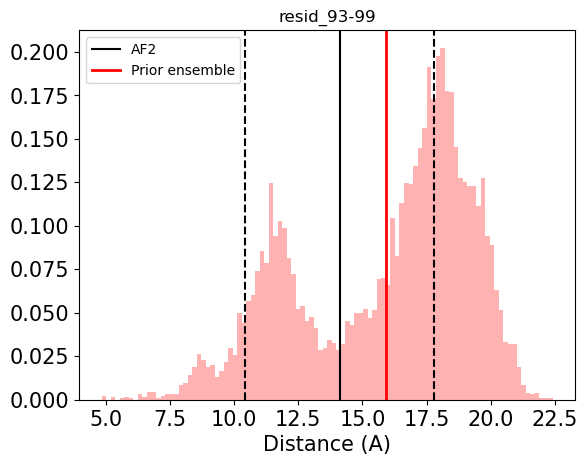

In [92]:
# import libraries
i=1
# plot experimental average and error
_ = plt.axvline(exp[i-1,0],c='k',label="AF2")
_ = plt.axvline(exp[i-1,0]-exp[i-1,1],c='k',linestyle="--")
_ = plt.axvline(exp[i-1,0]+exp[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="Prior ensemble",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')
plt.title(labels[i-1])
plt.xlabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.savefig(data_f+str(labels[i-1])+'.pdf')

In this case we can see that the calculated average is within the experimental error, which is great. 
Let's consider now a different datapoint

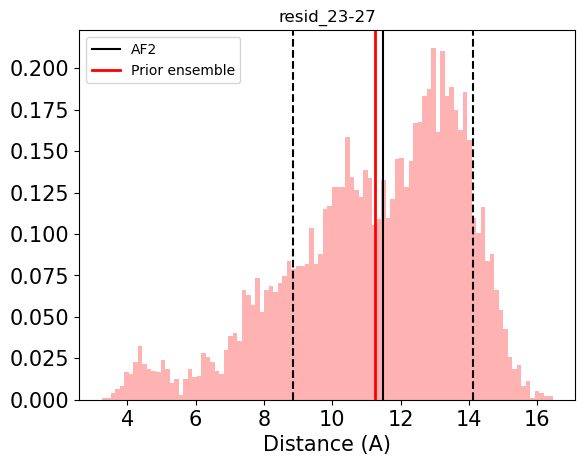

In [93]:
i=2    
# plot experimental average and error
_ = plt.axvline(exp[i-1,0],c='k',label="AF2")
_ = plt.axvline(exp[i-1,0]-exp[i-1,1],c='k',linestyle="--")
_ = plt.axvline(exp[i-1,0]+exp[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="Prior ensemble",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')

plt.title(labels[i-1])
plt.legend()

plt.xlabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig(data_f+str(labels[i-1])+'.pdf')
plt.show()
plt.close()

In this case the calculated average is clearly far away from the experiment. In general, it is convenient to plot all the datapoints together in the following fashion:


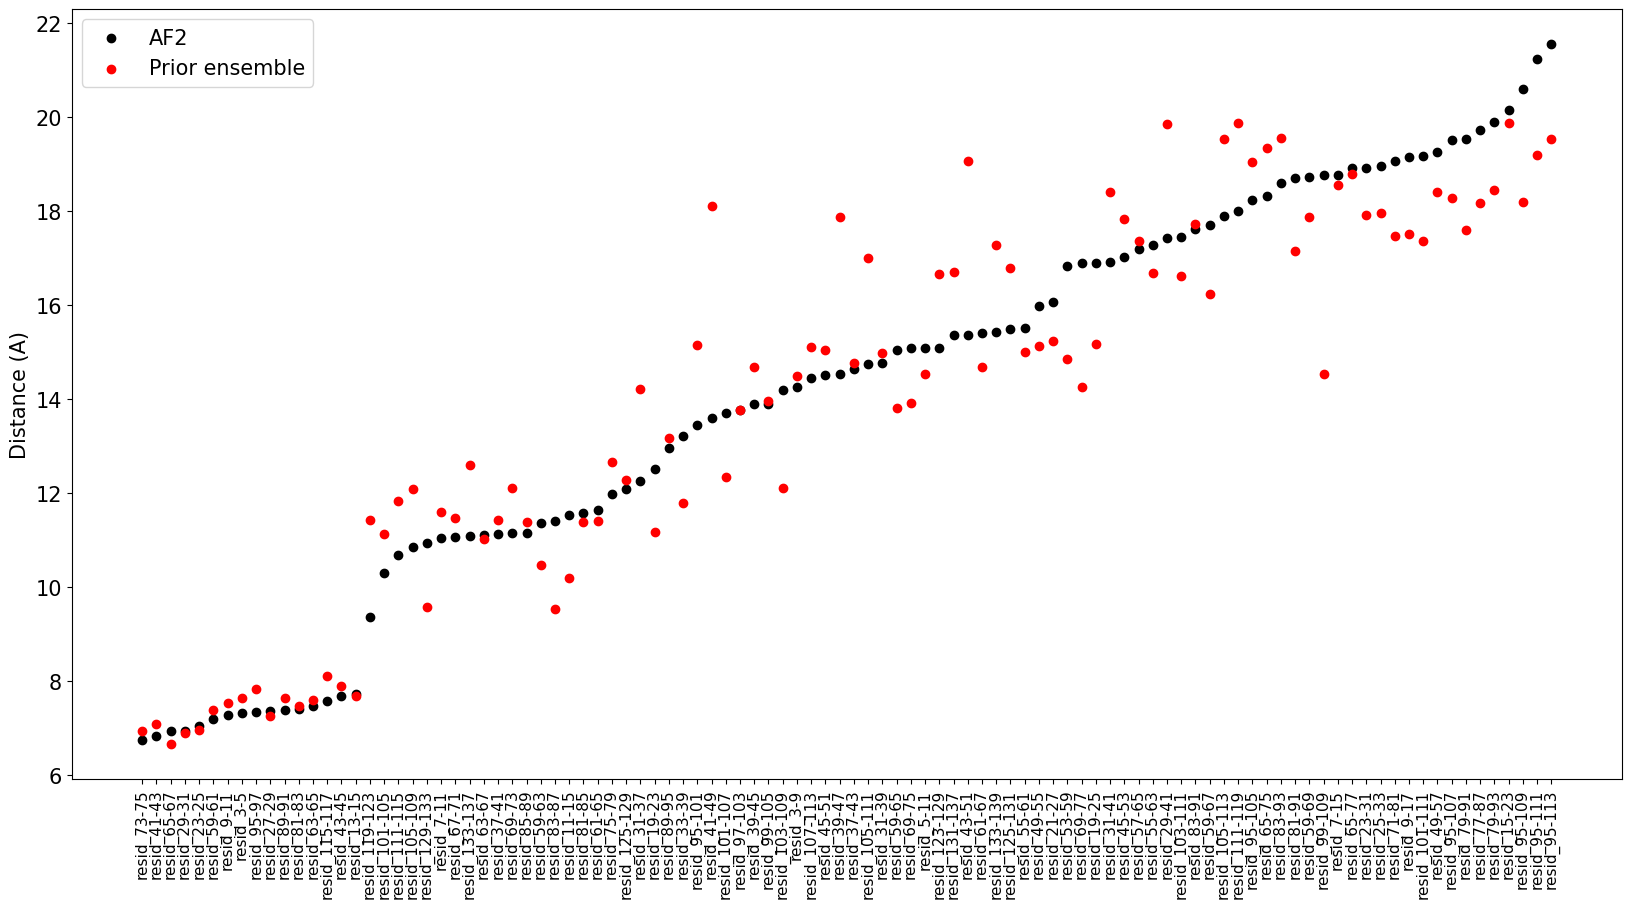

In [17]:
averages = np.average(calc[:,0:],axis=0)
idx_ordered = np.argsort(exp[:,0])

fig, ax = plt.subplots(figsize=(20, 10))

xx = range(len(labels))
plt.scatter(xx,exp[idx_ordered,0],c='k',label="AF2")


plt.scatter(xx,averages[idx_ordered],c='r',label="Prior ensemble")
plt.legend()
plt.ylabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.legend(fontsize=15) 
_ = plt.xticks(xx,[labels[l] for l in idx_ordered],rotation=90,size=11)



# 2 BME reweighting

We are now ready to run the BME script. First, we have to import the module and specify the experimental/calculated datafiles 



In [18]:

import BME as BME
bme_dir = os.getcwd().split("notebook")[0]
sys.path.append(bme_dir)
print(bme_dir)

exp_file = data_f+"AF_contacts_constr.txt"
calc_file = data_f+"AF_contacts_calc.txt" 



print(exp_file)
print(calc_file)

/Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/BME_IDP/
/Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/asyn/mmseqs/AF_contacts_constr.txt
/Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/asyn/mmseqs/AF_contacts_calc.txt


And then we run the script itself

In [19]:

rew = BME.Reweight("example_AF_IDP")

print(rew)
# load the experimental and calculated datasets
rew.load(exp_file,calc_file)

# fit the data 
chi2_before, chi2_after, phi = rew.fit(theta=0.7)

# print statistics
print("Chi2 before BME %.2f" % chi2_before)
print("Chi2 after  BME %.2f" % chi2_after)
print("Fraction of effective frames %.2f" % phi)

Chi2 before BME 0.18
Chi2 after  BME 0.02
Fraction of effective frames 0.19


By definition the error before the fit is larger compared to the error after fitting. The ouptut of the fitting procedure is in essence a new set of weights.  These weights can be retrieved using the function

```
w_new = rew.get_weights()
```

And can be used to calculate any desired quantity (angle/distance distributions, averages, etc.)

We can first compare them to the initial weights  $w_0 = 1/n$


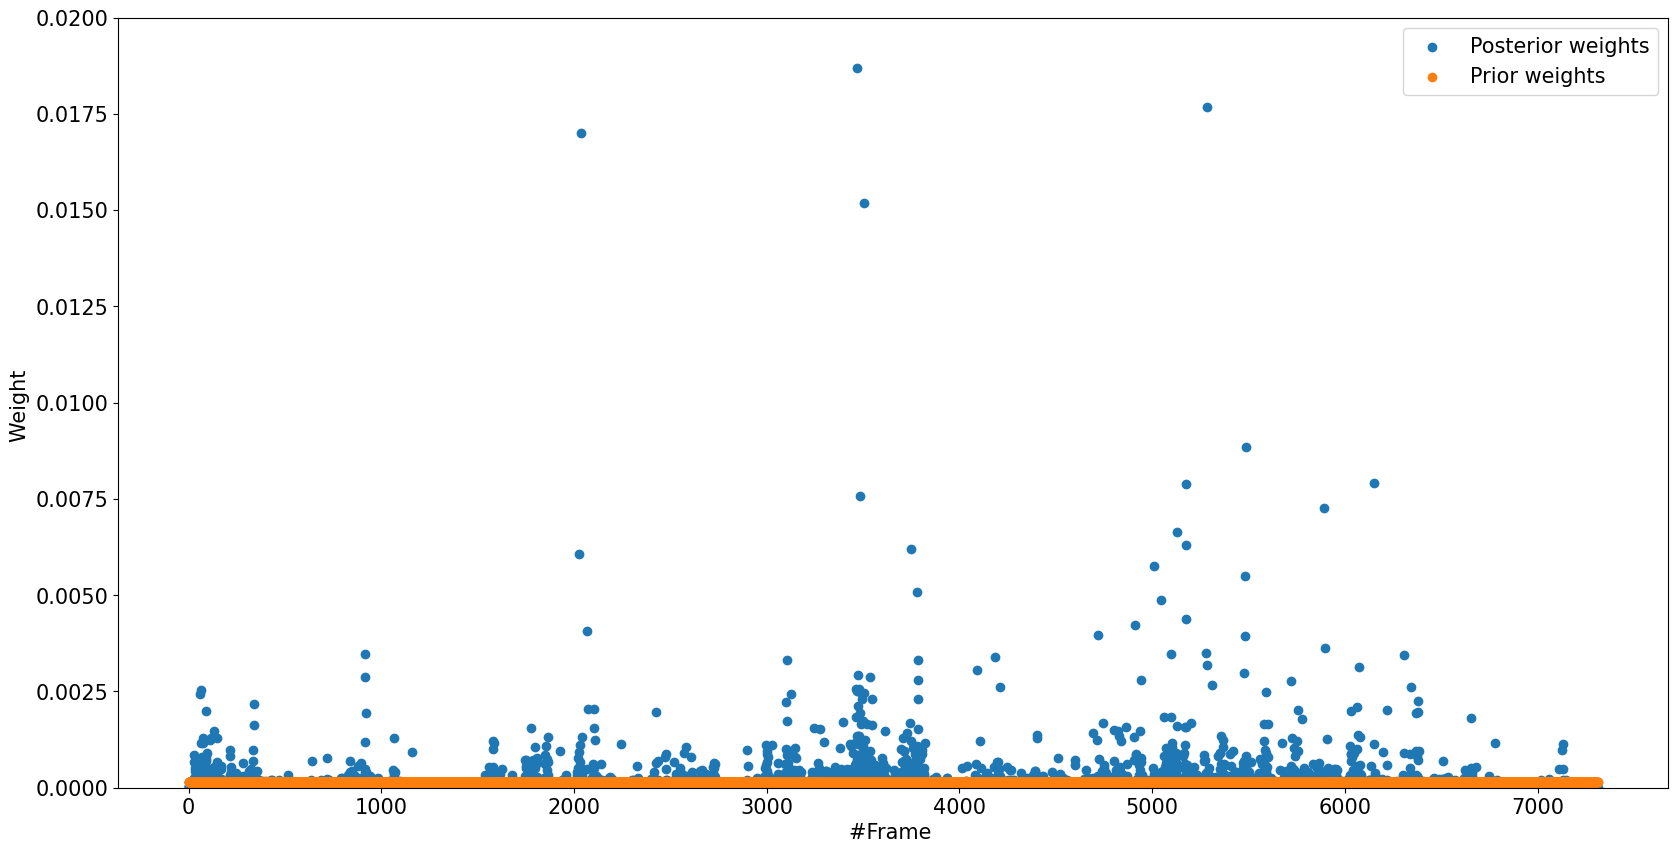

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
w0 = rew.get_w0()
w_new = rew.get_weights()

plt.scatter(range(len(w0)),w_new,label="Posterior weights")
plt.scatter(range(len(w0)),w0,label="Prior weights")
plt.ylim(0.00,0.02)
plt.legend()
plt.xlabel("#Frame ",size=15) 
plt.ylabel("Weight ",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15) 
plt.show()
plt.close()




We can see that the initial weights are all equal (each weight is 1/20000). While in the optimized weights some of them have a large weights, and many more have a weight which is almost zero. 
One possible way to quantify how much the weights are modified is given by the fraction of effective frame $\phi$.
When we choose a small parameter $theta$, the $\chi^2$ after minimization will be small, but at the cost of "throwing away" many samples (small $\phi$). 

For example, this is the expected behavior of $\phi$ and $\chi^2_{opt}/\chi^2_0$ for different values of theta.

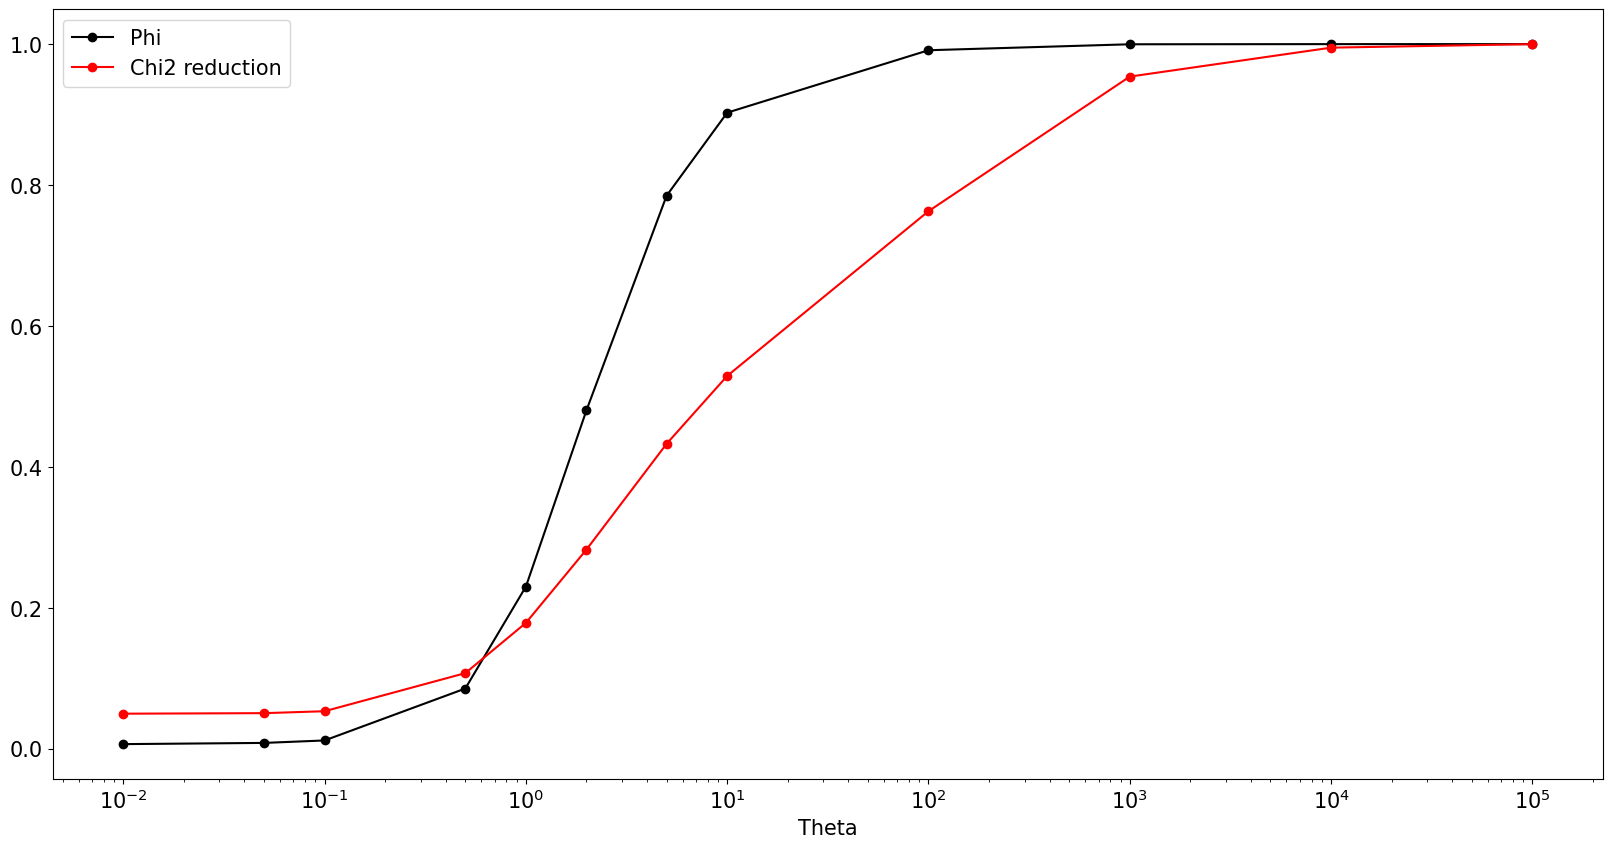

In [98]:
thetas = [0.01,0.05,0.1,0.5,1,2,5,10,100,1000,10000,100000]

fig, ax = plt.subplots(figsize=(20, 10))

chi2 = []
phis = []
for t in thetas:
    chi2_before, chi2_after, phi = rew.fit(theta=t)
    phis.append(phi)
    chi2.append(chi2_after/chi2_before)
    #(t,chi2_after/chi2_before,c="k")
    #plt.scatter(t,phi,c="r")
plt.plot(thetas,phis,"-o",label="Phi",c="k")
plt.plot(thetas,chi2,"-o",label="Chi2 reduction",c="r")
plt.legend()
plt.xscale('log')
plt.xlabel("Theta",size=15)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15) 
plt.savefig(data_f+'optim_theta.pdf',bbox_inches='tight')

#plt.xlim(0,100)


# 3. Use the optimized weights. 

The optimal weights can be used to calculate averages. BME provides a simple way of comparing the original with the optimized averages using the function

```
stats = rew.predict(exp_file,calc_file,out_file)
```

This function outputs some statistics and (optionally) a file with all the averages. Let's see it in action:

In [21]:
chi2_before, chi2_after, phi = rew.fit(theta=0.7)

stats = rew.predict(exp_file,calc_file,"example_AF_IDP")

print("%10s %10s %10s" % (" ","Original","Optimized"))
print("%10s %10.3f %10.3f" % ("Chi2",stats[0],stats[3]))
print("%10s %10.3f %10.3f" % ("RMSD",stats[1],stats[4]))
print("%10s %10d %10d" % ("Violations",stats[2],stats[5]))

print("--------------------------------------")
print("")



             Original  Optimized
      Chi2      0.182      0.021
      RMSD      1.398      0.468
Violations          4          0
--------------------------------------



The file "example_01_couplings" contains more info: the experimental average and error, and the calculated averages before and after reweighting. The last column indicates if the calculated averages are within the experimental error (0) or not (1). Therefore, 00 means that both the original and reweighted averages are within error, 10 means that only the reweighted average is within the error and so on. 


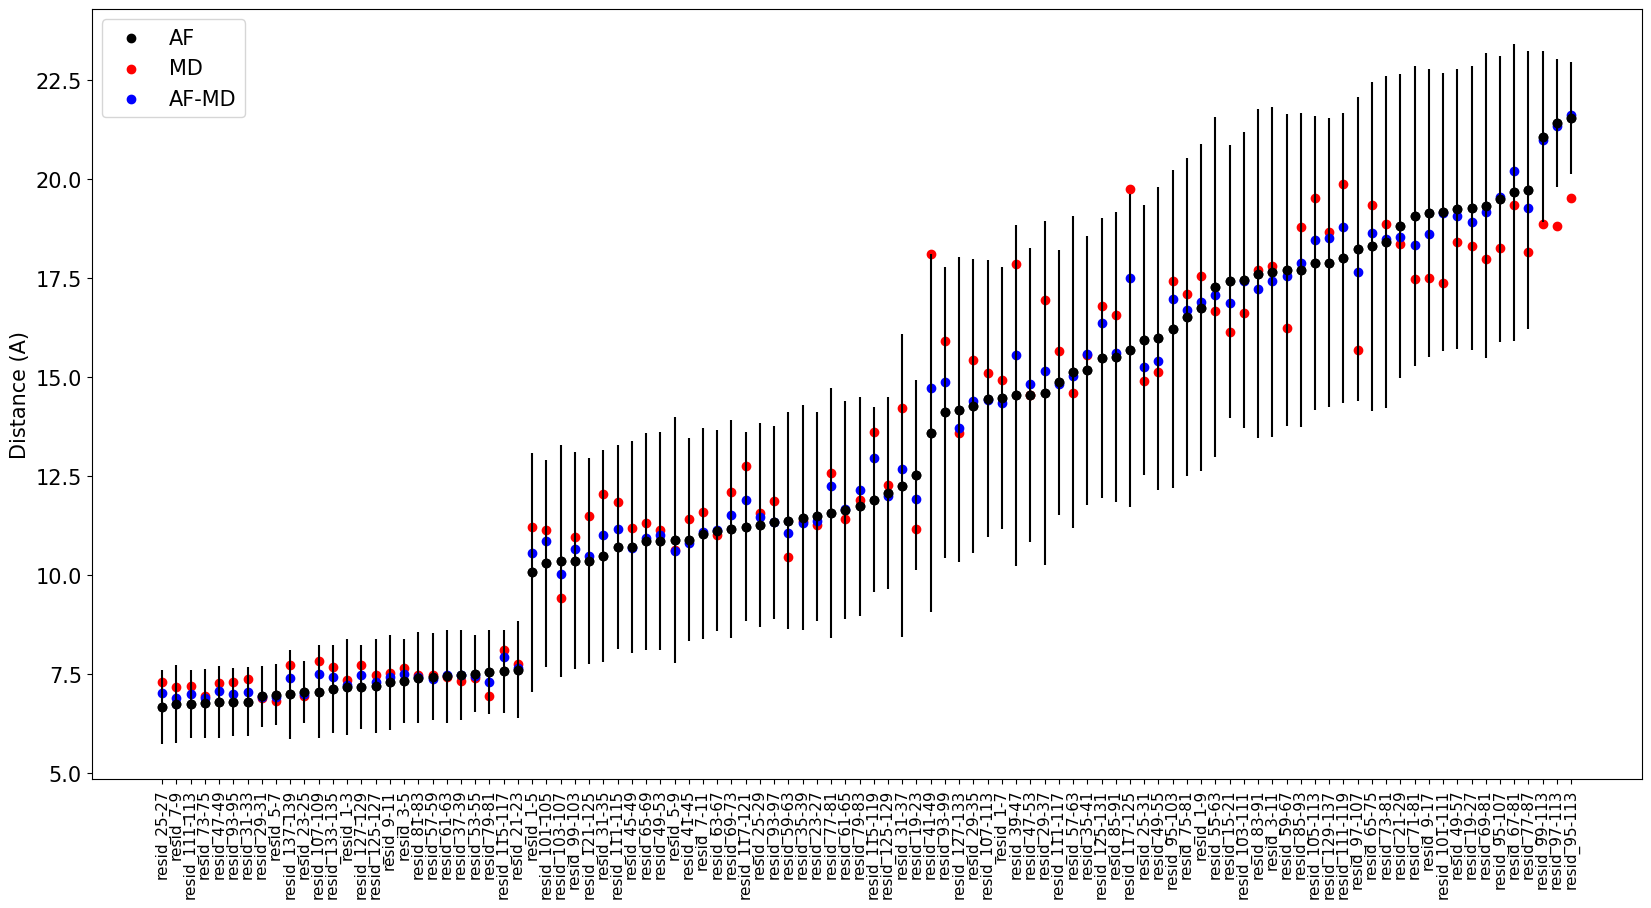

In [100]:

results = np.loadtxt("example_AF_IDP",usecols=(1,2,3,4,5))
labels = np.loadtxt("example_AF_IDP",usecols=(0),dtype=str)

# order by magnitude to make the plot nicer
idx_ordered = np.argsort(results[:,0])


fig, ax = plt.subplots(figsize=(20, 10))
xx = range(len(labels))
# plot experiment
plt.errorbar(xx, results[idx_ordered,0],results[idx_ordered,1],c='k',fmt="o",label="_no_legend")
plt.scatter(xx, results[idx_ordered,0],c='k',label="AF")


plt.scatter(xx,results[idx_ordered,2],c='r',label="MD")
plt.scatter(xx,results[idx_ordered,3],c='b',label="AF-MD")
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc="upper left") 

plt.ylabel("Distance (A)",size=15)
_ = plt.xticks(xx,[labels[l] for l in idx_ordered],rotation=90,size=11)


plt.savefig(data_f+'Prior_Posterior_AF2_distances.pdf',bbox_inches='tight')

This looks great. The alogrithm is doing exactly what it is supposed to do. We can further inspect C2-H1H2 and see what happens to the reweighted distribution:

7313


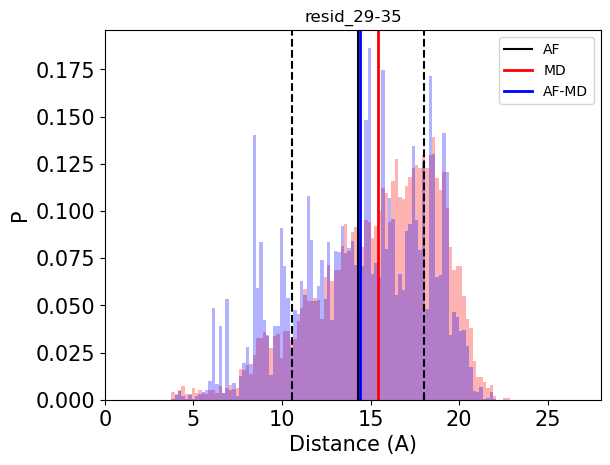

In [125]:
i=15
# plot experimental average and error
_ = plt.axvline(results[i-1,0],c='k',label="AF")
_ = plt.axvline(results[i-1,0]-results[i-1,1],c='k',linestyle="--")
_ = plt.axvline(results[i-1,0]+results[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="MD",lw=2)

print(len(w_new))
average_optimized = np.average(calc[:,i-1],weights=w_new)
_ = plt.axvline(average_optimized,c='b',label="AF-MD",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')

_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='b',weights=w_new)
plt.xlim(0,28)
plt.title(labels[i-1])
plt.xlabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('P',fontsize=15)
plt.legend()
plt.savefig(data_f+str(labels[i-1])+'_post.pdf',bbox_inches='tight')


plt.show()
plt.close()

7313


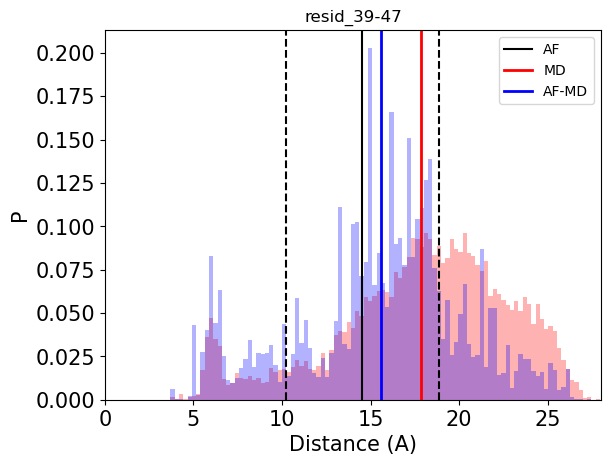

In [121]:
i=34
# plot experimental average and error
_ = plt.axvline(results[i-1,0],c='k',label="AF")
_ = plt.axvline(results[i-1,0]-results[i-1,1],c='k',linestyle="--")
_ = plt.axvline(results[i-1,0]+results[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="MD",lw=2)

print(len(w_new))
average_optimized = np.average(calc[:,i-1],weights=w_new)
_ = plt.axvline(average_optimized,c='b',label="AF-MD",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')

_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='b',weights=w_new)
plt.xlim(0,28)
plt.title(labels[i-1])
plt.xlabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('P',fontsize=15)
plt.legend()
plt.savefig(data_f+str(labels[i-1])+'_post.pdf',bbox_inches='tight')


plt.show()
plt.close()

7313


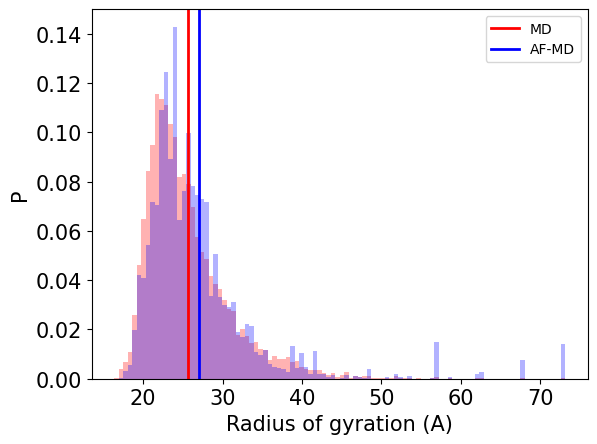

25.639706174400896 25.599343435327718 5.678799880453911
26.98076037374315 27.052940306163936 8.005870876803938


In [53]:
#Rg
# Plot calculated average
i=0
import numpy as np
import matplotlib
average = np.average(rg_A[:])
_ = plt.axvline(average,c='r',label="MD",lw=2)

print(len(w_new))
average_optimized = np.average(rg_A[:],weights=w_new)
_ = plt.axvline(average_optimized,c='b',label="AF-MD",lw=2)

# plot histogram of the data
_ = plt.hist(rg_A[:],bins=100,density=True,alpha=0.3,color='r')

_ = plt.hist(rg_A[:],bins=100,density=True,alpha=0.3,color='b',weights=w_new)




plt.xlabel('Radius of gyration (A)',fontsize=15)
plt.ylabel('P',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()


plt.savefig(data_f+'R_g.pdf',bbox_inches='tight')

plt.show()
plt.close()

#print(average_optimized)
counts, bins = np.histogram(rg_A[:])
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)

mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

print(average,mean,sd)

counts, bins = np.histogram(rg_A[:],weights=w_new)
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)

mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

print(average_optimized,mean,sd)

In [104]:
dssp=md.compute_dssp(traj,simplified='false')
print('dssp data shape', dssp.shape)
residuesALL=b = [i+1 for i in range(140)]
array2 = np.vstack((residuesALL,dssp))
dssp=np.c_[["" for x in range(len(array2))],array2]

df2=pd.DataFrame(data=dssp[1:,1:],
                index=dssp[1:,0],
                columns=dssp[0,1:])

print(pd.DataFrame(data=dssp[1:,1:],
                  index=dssp[1:,0],
                  columns=dssp[0,1:]))

df2.to_csv(data_f+'dssp.dat', header=True, index=None, sep=' ', mode='w')


dssp data shape (7313, 140)
    1  2  3  4  5  6  7  8  9 10  ... 131 132 133 134 135 136 137 138 139 140
    C  C  C  C  C  E  E  E  E  C  ...   C   C   C   C   C   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   H   H   C   C   C   C   C   C   C   C
    C  C  C  C  C  E  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
    C  C  C  C  C  E  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   C   C   C   C   C   C
.. .. .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   E   C   C   C   C   C
    C  C  C  H  H  H  C  C  C  C  ...   C   C   C   C   E   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   E   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   E   C   C   C   C   C
    C  C  C  C  C  C  C  C  C  C  ...   C   C   C   C   E   C   C   C   C   C

[7313 rows x 140 columns]


In [105]:

print(len(dssp)-1)

dsspC_resid=[]
dsspH_resid=[]
dsspE_resid=[]

for resid in range(1,141):
    dummyC=0
    dummyH=0
    dummyE=0
    for t in range(0,len(dssp)-1):
        t_i=t+1
       #print(weights_10[t],sasa[t_i][resid])
        if (dssp[t_i][resid] =='C'):
            dummyC+=float(w0[t])
        elif(dssp[t_i][resid] =='H'):
            dummyH+=float(w0[t])
        elif(dssp[t_i][resid] =='E'):
            dummyE+=float(w0[t])
        
    dsspC_resid.append(dummyC)
    dsspH_resid.append(dummyH)
    dsspE_resid.append(dummyE)
    print(resid,dummyC,dummyH,dummyE)


7313
1 0.999999999999946 0 0
2 0.9559688226445606 0.0304936414604129 0.013537535894981533
3 0.8746068644878702 0.07712293176534916 0.04827020374675224
4 0.8115684397647873 0.09202789552851061 0.09640366470668645
5 0.8082866128811561 0.10706960207849005 0.08464378504033888
6 0.8454806508956432 0.08847258307124274 0.06604676603309158
7 0.8863667441542153 0.0679611650485435 0.04567209079721034
8 0.875427321208778 0.055107343087651986 0.06946533570354145
9 0.9000410228360121 0.040886093258580516 0.05907288390537384
10 0.904280049227369 0.0466292903049363 0.04909066046766021
11 0.9018186790646456 0.03623683850676869 0.06194448242855173
12 0.9351839190482296 0.03760426637494864 0.027211814576781023
13 0.8854095446464896 0.06413236701763965 0.05045808833584016
14 0.9107069602078135 0.05305620128538206 0.03623683850676869
15 0.8724189798987827 0.048133460959934246 0.07944755914125508
16 0.8446601941747354 0.05278271571174607 0.10255709011349622
17 0.8549159031860829 0.044714891289484374 0.1003

135 0.9245179816764282 0.005332968685901823 0.07014904963763142
136 0.8100642691097897 0.002324627375905921 0.18761110351428906
137 0.9649938465745465 0.0006837139340899768 0.03432243949131676
138 0.9777109257486174 0.0006837139340899768 0.021605360317243232
139 0.9949405168876813 0.0006837139340899768 0.004375769178175852
140 0.999999999999946 0 0


140


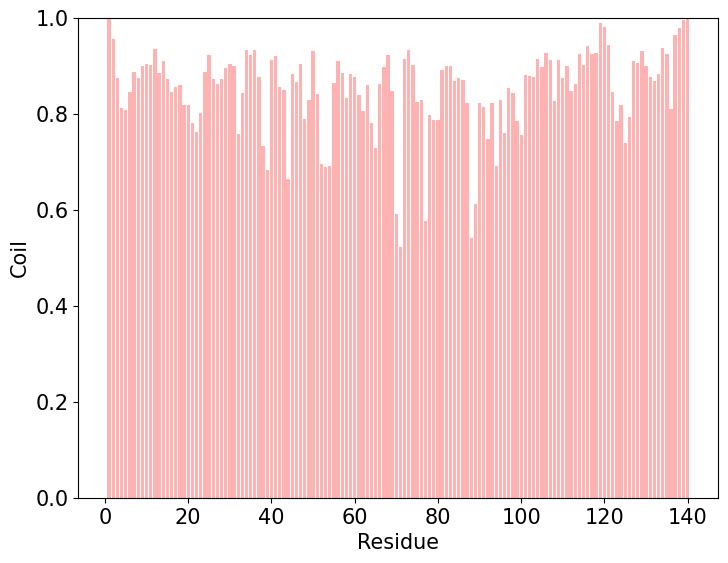

In [106]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(len(dsspC_resid))
ax.bar(residuesALL,dsspC_resid,color="red",alpha=0.3)
plt.ylim(0,1)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('Coil',fontsize=15)
ax.tick_params(axis='both', labelsize=15)

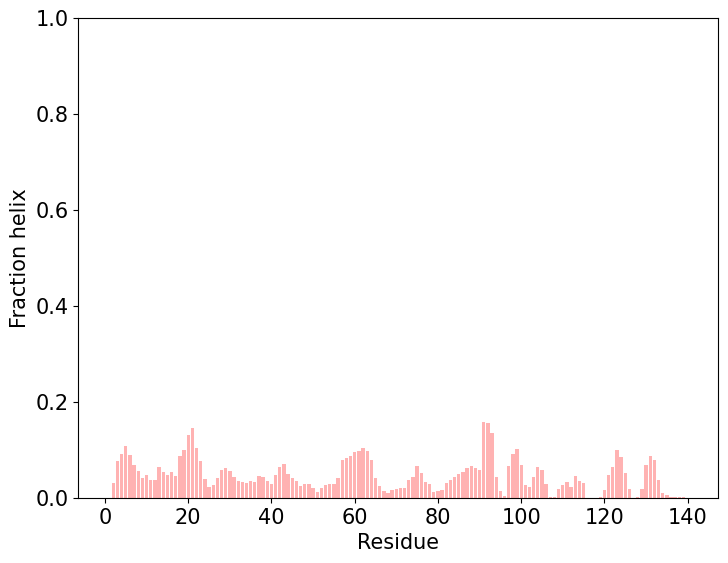

In [107]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspH_resid,color="red",alpha=0.3)
plt.ylim(0,1)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('Fraction helix',fontsize=15)
ax.tick_params(axis='both', labelsize=15)

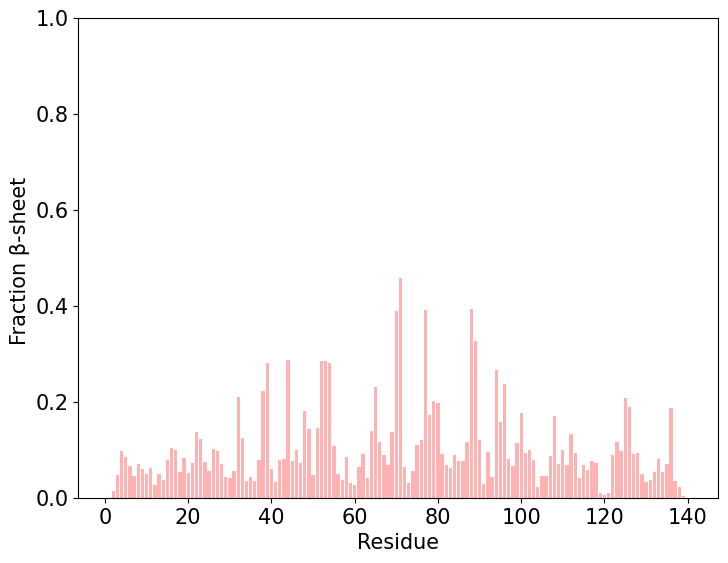

In [108]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspE_resid,color="red",alpha=0.3)
plt.ylim(0,1)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('Fraction β-sheet ',fontsize=15)
ax.tick_params(axis='both', labelsize=15)

In [109]:

print(len(dssp)-1)

dsspC_resid_w=[]
dsspH_resid_w=[]
dsspE_resid_w=[]

for resid in range(1,141):
    dummyC=0
    dummyH=0
    dummyE=0
    for t in range(0,len(dssp)-1):
        t_i=t+1
        if (dssp[t_i][resid] =='C'):
            dummyC+=float(w_new[t])
        elif(dssp[t_i][resid] =='H'):
            dummyH+=float(w_new[t])
        elif(dssp[t_i][resid] =='E'):
            dummyE+=float(w_new[t])
        
    dsspC_resid_w.append(dummyC)
    dsspH_resid_w.append(dummyH)
    dsspE_resid_w.append(dummyE)
    print(resid,dummyC,dummyH,dummyE)



7313
1 1.0000000000000002 0 0
2 0.9310672521251201 0.06286421113680914 0.00606853673807116
3 0.8173435738727507 0.13009034642625422 0.05256607970099529
4 0.7470092381102716 0.1560630092170874 0.09692775267264078
5 0.7633976072957107 0.1684585426519964 0.06814385005229237
6 0.8092814999368144 0.14071040148527633 0.050008098577908805
7 0.8650125445405411 0.09988249939894076 0.035104956060517715
8 0.8852910377998969 0.07279782426874173 0.0419111379313611
9 0.8976688362744761 0.05551694322005454 0.046814220505468504
10 0.9046481252254717 0.0645986514861229 0.030753223288405372
11 0.9048703558331529 0.050014854053569285 0.045114790113277244
12 0.938411176800473 0.04203756939029692 0.019551253809229497
13 0.8904684373156367 0.0531452109096497 0.05638635177471433
14 0.9376231419587687 0.028432836556441375 0.03394402148479067
15 0.8937856916090723 0.029969201217885766 0.07624510717304253
16 0.8864821973976 0.03275569507818293 0.08076210752421771
17 0.8629457163914431 0.024874156206783446 0.112

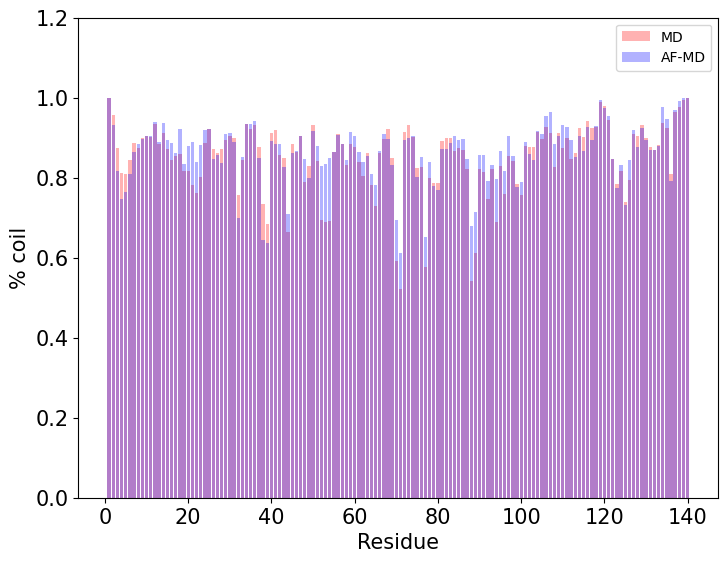

In [110]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspC_resid,color="r",alpha=0.3,label="MD")
ax.bar(residuesALL,dsspC_resid_w,color="b",alpha=0.3,label="AF-MD")
plt.ylim(0,1.2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.xlabel('Residue',fontsize=15)
plt.ylabel('% coil',fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.legend()
plt.savefig(data_f+'coil.pdf',bbox_inches='tight')



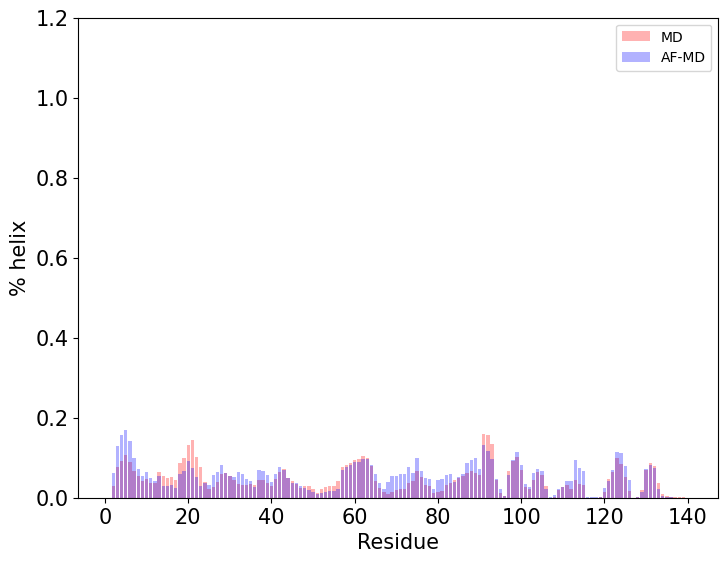

In [111]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspH_resid,color="r",alpha=0.3,label="MD")
ax.bar(residuesALL,dsspH_resid_w,color="b",alpha=0.3,label="AF-MD")
plt.ylim(0,1.2)


plt.xlabel('Residue',fontsize=15)
plt.ylabel('% helix',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

#plt.legend(fontsize=20,loc=1,prop={'size': 5})
ax.tick_params(axis='both', labelsize=15)
ax.legend()
plt.savefig(data_f+'helix.pdf',bbox_inches='tight')



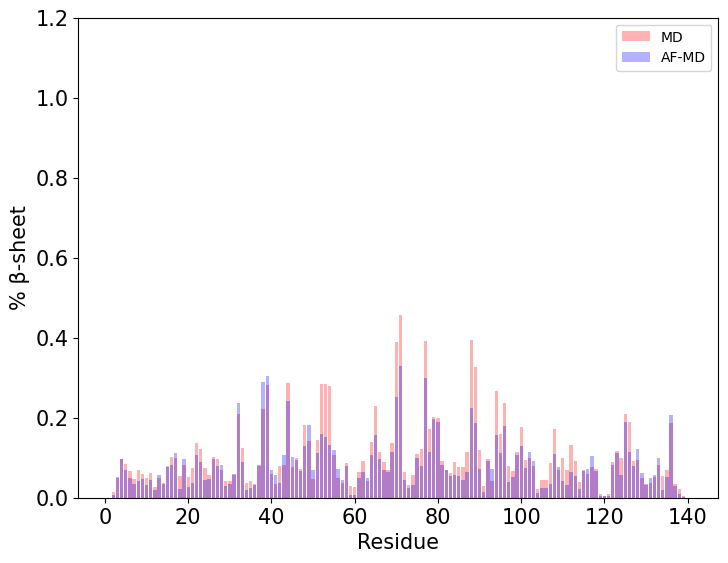

In [112]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspE_resid,color="r",alpha=0.3,label="MD")
ax.bar(residuesALL,dsspE_resid_w,color="b",alpha=0.3,label="AF-MD")
plt.ylim(0,1.2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('% β-sheet',fontsize=15)
#plt.legend(fontsize=20,loc=1,prop={'size': 5})
ax.tick_params(axis='both', labelsize=15)
ax.legend()
plt.savefig(data_f+'beta.pdf',bbox_inches='tight')

In [52]:
import itertools
import os
from pathlib import Path
N = 100
n_rounds = 1

folder = Path(data_f)
n_frames = traj.n_frames
inds = np.arange(n_frames)
ca_inds = topology.select("name CA")
protein_inds= topology.select("protein")

for i in range(0,n_rounds):
    (folder  / f"r{i}").mkdir(exist_ok=True)
    inds_sample = np.random.choice(inds, size=N, replace=False,p=w_new)
    traj[inds_sample].atom_slice(ca_inds).save_pdb((folder / f"r{i}" / f"conf-ca.pdb").as_posix())
    traj[inds_sample].atom_slice(protein_inds).save_pdb((folder / f"r{i}" / f"conf-protein.pdb").as_posix())

In [28]:
## Experimental comparison to NMR chem-shifts

In [114]:
f=open(data_f+'plumed_NMR.dat', 'w')
f.write("MOLINFO STRUCTURE="+str(pdb)+"\n")
f.write("WHOLEMOLECULES ENTITY0=1-2017\n")
f.write("cs: CS2BACKBONE ATOMS=1-2017 DATADIR="+str(data_f)+"nmr_data"+" NOPBC TEMPLATE=../priors/topol_asyn_MD.pdb\n")
f.write("PRINT ARG=* FILE=COLVAR_SHIFTS STRIDE=1\n")
f.close()

In [47]:
%%bash
# backcalculated chem. shifts from trajectory
plumed driver --mf_dcd ../priors/9SBdisp-extended-protein/asyn_MD.dcd --plumed plumed_NMR.dat


DRIVER: Found molfile format trajectory dcd with name ../DESRES-Trajectory_pnas2018b-asyn-a99SBdisp-extended-protein/pnas2018b-asyn-a99SBdisp-extended-protein/asyn_traj_10.dcd
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0-dev (git: ba982d341) compiled on Feb 15 2021 at 19:38:30
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/fdn/PLUMED/
PLUMED: For installed feature, see /Users/fdn/PLUMED//src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 2017
PLUMED: File suffix: 
PLUMED: FILE: plumed_NMR.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named /Volumes/BROTZAKIS/PROJECTS_LOC

In [50]:


#!!!!Note that since one neads to remove the ""#! Fields" label from the COLVAR_SHIFTS file before performing the analysis below.!!!


csAB = pd.read_csv(str(data_f)+'/COLVAR_SHIFTS', delim_whitespace=True)

In [115]:

#Make dictionaries of different chemical shift types
#For AB alone:

csAB_dict = {'ca': np.asarray(csAB.loc[:, 'cs.ca-0-3':'cs.ca-0-137']), 'cb': np.asarray(csAB.loc[:, 'cs.cb-0-3':'cs.cb-0-137']),
             'co': np.asarray(csAB.loc[:, 'cs.co-0-3':'cs.co-0-137']), 
             'hn': np.asarray(csAB.loc[:, 'cs.hn-0-3':'cs.hn-0-137']), 'nh': np.asarray(csAB.loc[:, 'cs.nh-0-3':'cs.nh-0-137'])}

#Here it reads +2, why? Because it conceives the #! and FIELDs two extra columns. Remove from file

#For data (shared between both sets of simulations)
data_dict = {'ca': np.asarray(csAB.loc[:, 'cs.expca-0-3':'cs.expca-0-137']), 'cb': np.asarray(csAB.loc[:, 'cs.expcb-0-3':'cs.expcb-0-137']),
             'co': np.asarray(csAB.loc[:, 'cs.expco-0-3':'cs.expco-0-137']),
             'hn': np.asarray(csAB.loc[:, 'cs.exphn-0-3':'cs.exphn-0-137']), 'nh': np.asarray(csAB.loc[:, 'cs.expnh-0-3':'cs.expnh-0-137'])}



cs_residues = {'ca': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,112,113,114,115,116,118,119,121,122,123,124,125,126,127,129,130,131,132,133,134,135,136,137],
               'cb': [3,4,5,6,8,9,10,11,12,15,16,17,18,19,20,21,22,23,26,27,28,29,30,32,33,34,37,38,39,40,44,45,48,49,52,53,54,55,56,57,58,59,60,61,63,64,66,69,70,71,72,74,75,76,77,78,80,81,82,83,85,87,89,90,91,92,94,95,96,97,98,100,103,104,105,107,110,113,114,115,116,118,119,121,122,123,124,125,126,127,129,130,131,133,135,136,137],
               'co': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,107,109,110,111,112,113,114,115,116,118,119,121,122,123,124,125,126,127,129,130,131,132,133,134,135,136,137],
               'hn': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,112,113,114,115,116,118,119,121,122,123,124,125,126,127,129,130,131,132,133,134,135,136,137],
               'nh': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,44,45,46,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,112,113,114,115,116,118,119,121,122,123,124,125,126,127,129,130,131,132,133,134,135,136,137]}


In [118]:
import math
csAB_means = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

csAB_means_AF = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

rmsderr = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

rmsderr_AF = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

csAB_std = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

csAB_std_AF = {'ca': [],
               'cb': [],
               'co': [],
               'hn': [],
               'nh': []}

for k in cs_residues.keys():
    rmsd=0
    rmsd_AF=0
    val=0.
    diff=0
    diff_AF=0
    for j in range(0,len(csAB_dict[k][0])):
        
        csAB_means[k].append(np.average(csAB_dict[k][:,j]))
        


        
        csAB_means_AF[k].append(np.average(csAB_dict[k][:,j],weights=w_new))

        v1=np.average(csAB_dict[k][:,j])
        v2=np.average(csAB_dict[k][:,j],weights=w_new)
        v3=data_dict[k][0][j]
        diff+=math.pow(v1-v3,2.0)
        diff_AF+=math.pow(v2-v3,2.0)
    
    print('rmsd',k,math.sqrt(diff/float(len(csAB_dict[k][0]))),'rmsd_AF',k,math.sqrt(diff_AF/float(len(csAB_dict[k][0]))))
    rmsderr[k].append(math.sqrt(diff/float(len(csAB_dict[k][0]))))
    rmsderr_AF[k].append(math.sqrt(diff_AF/float(len(csAB_dict[k][0]))))

rmsd ca 0.6719939807638917 rmsd_AF ca 0.7313871147285612
rmsd cb 0.864271429612213 rmsd_AF cb 0.808771053939619
rmsd co 0.5559657739407458 rmsd_AF co 0.5673961339328844
rmsd hn 0.11477213518615219 rmsd_AF hn 0.11399853754882537
rmsd nh 1.3096595485779112 rmsd_AF nh 1.3755069097536214


1.3
1.36
1.38
0.56
3.01
0.6719939807638917
0.864271429612213
0.5559657739407458
0.11477213518615219
1.3096595485779112
('ca', [0.6719939807638917])
('cb', [0.864271429612213])
('co', [0.5559657739407458])
('hn', [0.11477213518615219])
('nh', [1.3096595485779112])


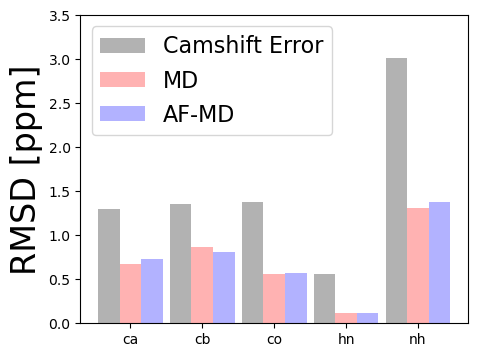

In [123]:
err = {"NH": 3.01, "HN": 0.56, "CA": 1.3, "CB": 1.36, "CO": 1.38}

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
for d in sorted(tuple(err.items())):
    print (d[1])
for d in sorted(tuple(rmsderr.items())):
    print(d[1][0])

ax.bar(np.arange(5)-0.3, [d[1] for d in sorted(tuple(err.items()))], capsize=8,
       color='black', alpha=0.3, label="Camshift Error",width=0.3)
for d in sorted(tuple(rmsderr.items())):
    print(d)

ax.bar(np.arange(5), [d[1][0] for d in sorted(tuple(rmsderr.items()))] ,
       capsize=8, color='red',alpha=0.3, label="MD",width=0.3)
ax.bar(np.arange(5)+.3, [d[1][0] for d in sorted(tuple(rmsderr_AF.items()))] ,
       capsize=8, color='blue',alpha=0.3, label="AF-MD",width=0.3)
ax.set_xticks(np.arange(5))
ax.set_xticklabels([d for d in rmsderr])

ax.set_ylabel("RMSD [ppm]", fontsize=24)
ax.set_ylim(0, 3.5)

ax.legend(fontsize=16)
plt.savefig(data_f+'RMSD_err.pdf',bbox_inches='tight')



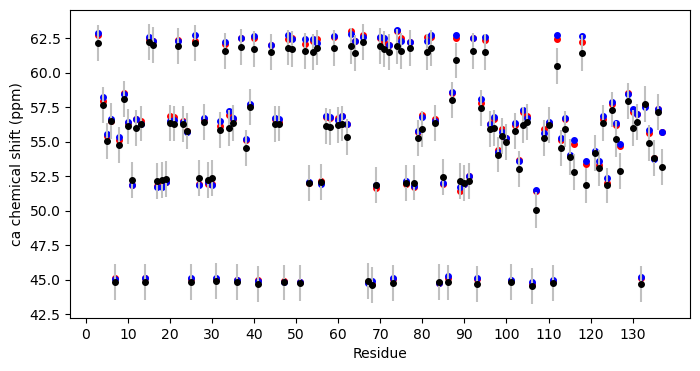

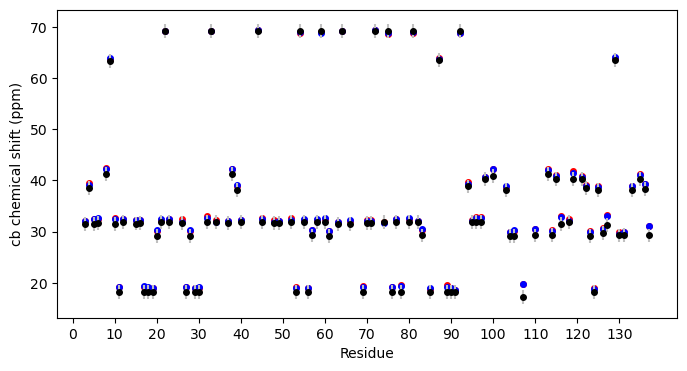

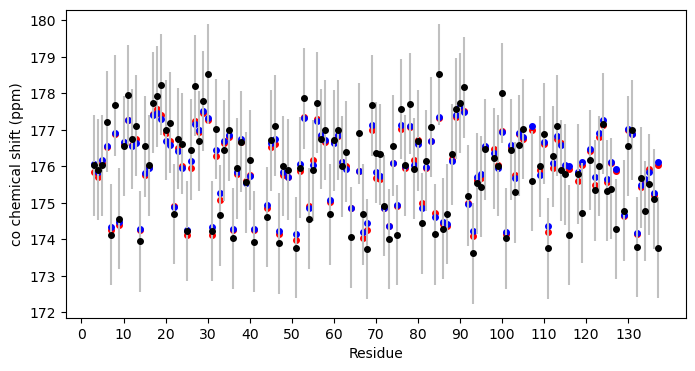

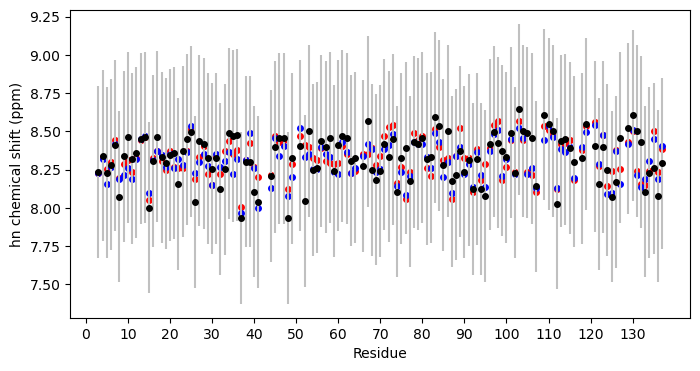

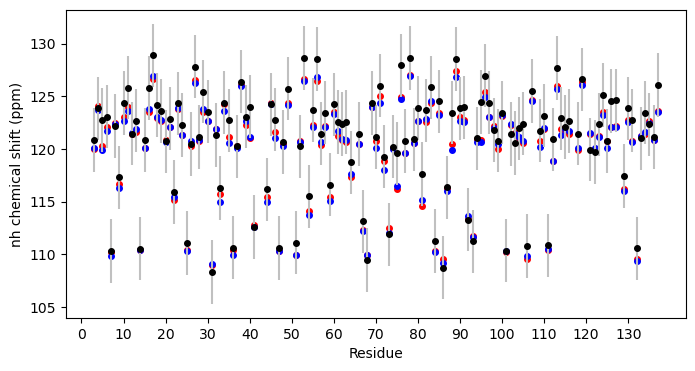

In [124]:
#Define colors 

#Plot camshift 
camshift_errs = {'ca': 1.3, 'cb': 1.36, 'co': 1.38, 'hn': 0.56, 'nh': 3.01}

for k in cs_residues.keys():
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111)
    yerror = [ camshift_errs[k] for i in range(len(cs_residues[k]))]
    ax.errorbar(cs_residues[k], data_dict[k].mean(axis=0), yerr=yerror, fmt='o', markersize='4', color='black', ecolor='silver')


    ax.scatter(cs_residues[k], csAB_means[k], color='red',s=4**2)
    ax.scatter(cs_residues[k], csAB_means_AF[k], color='blue',s=4**2)
    ax.set_xlabel("Residue")
    ax.set_ylabel("{} chemical shift (ppm)".format(k))

    ax.set_xticks(np.arange(0, 137, step=10));
    plt.savefig(str(data_f)+'/'+str(k)+'_CS_asyn.pdf'.format(i), format='pdf', dpi=2000, transparent=True)